In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import optimizers

# Initializing the CNN

model =Sequential()

model.add(Convolution2D(16, (3, 3),padding='same', activation='relu', input_shape=(224,224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Convolution2D(32, (3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Convolution2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(1024,activation='relu'))

model.add(Dropout(0.4))

# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax'))

# Compile the model
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [4]:
# image preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    horizontal_flip=True,
#                                    vertical_flip=False
#                                 )

valid_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 16
base_dir = "/content/drive/MyDrive/Split_smol"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

valid_set = valid_datagen.flow_from_directory(base_dir+'/val',
                                              target_size=(224, 224),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

Found 1284 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [5]:
class_dict = training_set.class_indices
li = list(class_dict.keys())
print(li)

['Actinic keratosis', 'Atopic Dermatitis', 'Dermatofibroma', 'Melanoma']


In [6]:
train_num = training_set.samples
valid_num = valid_set.samples
print(train_num)
print(valid_num)

1284
324


In [8]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/MyDrive/model"
checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

#fitting images to CNN
history = model.fit(training_set,
                         steps_per_epoch=80,
                         validation_data=valid_set,
                         epochs=15,
                         validation_steps=20,
                         callbacks=callbacks_list)



Epoch 1/15
80/80 [==============================] - ETA: 0s - loss: 0.4403 - accuracy: 0.8328
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to /content/drive/MyDrive/model
80/80 [==============================] - 32s 403ms/step - loss: 0.4403 - accuracy: 0.8328 - val_loss: 0.8023 - val_accuracy: 0.7000
Epoch 2/15
80/80 [==============================] - ETA: 0s - loss: 0.3869 - accuracy: 0.8406
Epoch 2: val_accuracy did not improve from 0.70000
80/80 [==============================] - 25s 315ms/step - loss: 0.3869 - accuracy: 0.8406 - val_loss: 1.1203 - val_accuracy: 0.6812
Epoch 3/15
80/80 [==============================] - ETA: 0s - loss: 0.3604 - accuracy: 0.8557
Epoch 3: val_accuracy improved from 0.70000 to 0.77812, saving model to /content/drive/MyDrive/model
80/80 [==============================] - 25s 316ms/step - loss: 0.3604 - accuracy: 0.8557 - val_loss: 0.8368 - val_accuracy: 0.7781
Epoch 4/15
80/80 [==============================] - ETA: 0s - loss: 0.38

In [9]:
import os;
print(os.getcwd())

/content


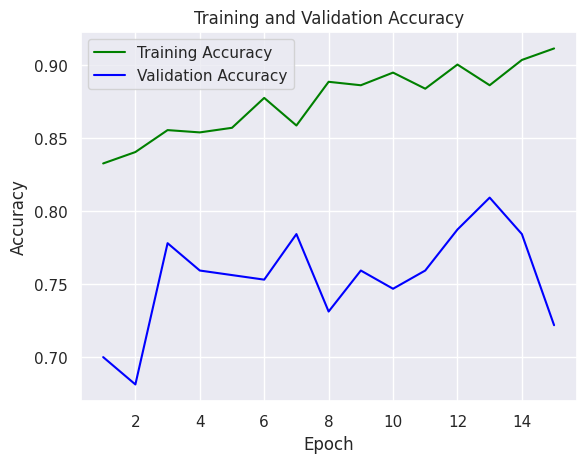

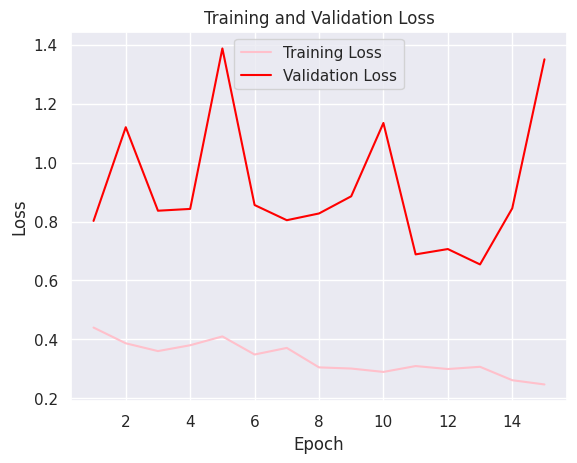

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 [==============================] - 0s 250ms/step


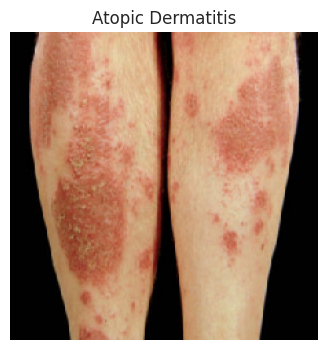

In [11]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/model_test/at_dt_1.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:
1/1 [==============================] - 0s 35ms/step


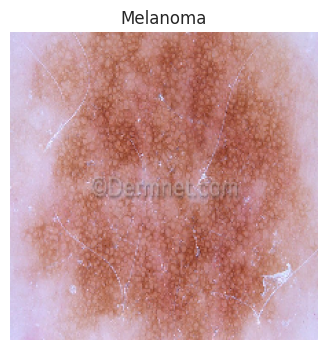

In [12]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/model_test/mel_1.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [13]:
valid_set.reset()
# start to predict
pred = model.predict(valid_set)

21/21 [==============================] - 2s 102ms/step


In [14]:
model.save('Skin_Disease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import tensorflow as tf
import pandas as pd
# use the confusion_matrix function provided by tensorflow to generate confusion matrix
con_mat = tf.math.confusion_matrix(labels=valid_set.classes, predictions=np.argmax(pred, axis=1)).numpy()

# normalize the confusion matrix
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

# convert the nomalized confusion matrix for better view
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = valid_set.class_indices.keys(),
                     columns = valid_set.class_indices.keys())

# show the nomalized confusion matrix
con_mat_df

,Actinic keratosis,Atopic Dermatitis,Dermatofibroma,Melanoma
Actinic keratosis,0.12,0.34,0.39,0.15
Atopic Dermatitis,0.11,0.37,0.32,0.20
Dermatofibroma,0.18,0.31,0.38,0.14
Melanoma,0.06,0.40,0.22,0.31


In [16]:
con_mat_df_explain = pd.DataFrame(con_mat,
                     index = valid_set.class_indices.keys(),
                     columns = valid_set.class_indices.keys())

# show the unnomalized confusion matrix
con_mat_df_explain

,Actinic keratosis,Atopic Dermatitis,Dermatofibroma,Melanoma
Actinic keratosis,10,27,31,12
Atopic Dermatitis,9,31,27,17
Dermatofibroma,14,25,30,11
Melanoma,5,32,18,25


In [17]:
import sklearn.metrics
# generate the clasification report by using the classification_report of sklearn package
report = sklearn.metrics.classification_report(valid_set.classes, np.argmax(pred, axis=1), target_names=valid_set.class_indices.keys())

# print the report
print(report)

                   precision    recall  f1-score   support

Actinic keratosis       0.26      0.12      0.17        80
Atopic Dermatitis       0.27      0.37      0.31        84
   Dermatofibroma       0.28      0.38      0.32        80
         Melanoma       0.38      0.31      0.34        80

         accuracy                           0.30       324
        macro avg       0.30      0.30      0.29       324
     weighted avg       0.30      0.30      0.29       324

